Import Libraries

In [1]:
import pandas as pd
from scipy.signal import find_peaks
import seaborn as sns
import numpy as np

Read the spectral data

In [2]:
spectra_df = pd.read_csv("../../data/exosomes.raw_spectrum_1.csv")

## 1 sample example

In [3]:
sample = spectra_df[spectra_df['SpecID'] == "210526-3-02"]
print(sample)

              SpecID   Seq  WaveNumber  Absorbance     SurID         Status
7923445  210526-3-02     0   200.00000   3176.8943  210526-3  Hyperglycemia
7923446  210526-3-02     1   200.68336   3136.9534  210526-3  Hyperglycemia
7923447  210526-3-02     2   201.36674   3154.1177  210526-3  Hyperglycemia
7923448  210526-3-02     3   202.05011   3163.3403  210526-3  Hyperglycemia
7923449  210526-3-02     4   202.73349   3172.8149  210526-3  Hyperglycemia
...              ...   ...         ...         ...       ...            ...
7926075  210526-3-02  2630  1997.26650   1676.8442  210526-3  Hyperglycemia
7926076  210526-3-02  2631  1997.94980   1660.6659  210526-3  Hyperglycemia
7926077  210526-3-02  2632  1998.63330   1668.3115  210526-3  Hyperglycemia
7926078  210526-3-02  2633  1999.31670   1665.3534  210526-3  Hyperglycemia
7926079  210526-3-02  2634  2000.00000   1672.5800  210526-3  Hyperglycemia

[2635 rows x 6 columns]


The parameters are based on Thomas Keogh's findings

In [4]:
peaks, _ = find_peaks(x=sample['Absorbance'], distance=152, prominence=42, width=6)

In [5]:
print(peaks)

[ 117  741 1171 1369 1600 1834]


<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

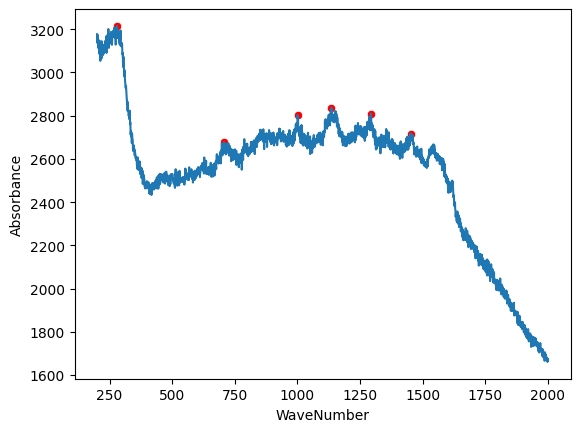

In [6]:
sns.lineplot(x="WaveNumber", y="Absorbance", data=sample)
sns.scatterplot(data=sample.iloc[peaks].reset_index(), x="WaveNumber", y="Absorbance", color="red")

## Create a peak list for each spectrum

A list of every sample

In [7]:
samples = spectra_df['SpecID'].unique()
print(samples)

['201210-1-00' '201210-1-01' '201210-1-02' ... '210526-3-07' '210526-3-08'
 '210526-3-09']


The status of each sample

In [8]:
statuses = spectra_df.groupby('SpecID').first()['Status']
print(statuses)


SpecID
201210-1-00           Normal
201210-1-01           Normal
201210-1-02           Normal
201210-1-03           Normal
201210-1-04           Normal
                   ...      
210526-3-45    Hyperglycemia
210526-3-46    Hyperglycemia
210526-3-47    Hyperglycemia
210526-3-48    Hyperglycemia
210526-3-49    Hyperglycemia
Name: Status, Length: 3045, dtype: object


Create a list of the sequence, wavenumber and absorbance for each sample

In [9]:
"""Seq_list = []
WaveNumber_list = []
Absorbance_list = []

for sample in samples:
    subset = spectra_df[spectra_df['SpecID'] == sample]
    peaks, _ = find_peaks(x=subset['Absorbance'], distance=152, prominence=42, width=6)
    Seq_list.append(peaks)
    peak_rows = subset.iloc[peaks]
    WaveNumber_list.append(peak_rows['WaveNumber'].to_list())
    Absorbance_list.append(peak_rows['Absorbance'].to_list())"""

"Seq_list = []\nWaveNumber_list = []\nAbsorbance_list = []\n\nfor sample in samples:\n    subset = spectra_df[spectra_df['SpecID'] == sample]\n    peaks, _ = find_peaks(x=subset['Absorbance'], distance=152, prominence=42, width=6)\n    Seq_list.append(peaks)\n    peak_rows = subset.iloc[peaks]\n    WaveNumber_list.append(peak_rows['WaveNumber'].to_list())\n    Absorbance_list.append(peak_rows['Absorbance'].to_list())"

In [11]:
Seq_list = []
WaveNumber_list = []
Absorbance_list = []

for _, group in spectra_df.groupby('SpecID'):
    peaks, _ = find_peaks(x=group['Absorbance'], distance=152, prominence=42, width=6)
    Seq_list.append(peaks)
    peak_rows = group.iloc[peaks]
    WaveNumber_list.append(peak_rows['WaveNumber'].to_list())
    Absorbance_list.append(peak_rows['Absorbance'].to_list())

In [12]:
featureset = statuses.copy()

In [13]:
featureset = featureset.to_frame()

In [14]:
featureset['Seq'] = Seq_list
featureset['WaveNumber'] = WaveNumber_list
featureset['Absorbance'] = Absorbance_list
print(featureset)

                    Status                                            Seq  \
SpecID                                                                      
201210-1-00         Normal                              [727, 1026, 1820]   
201210-1-01         Normal       [403, 617, 1021, 1378, 1532, 1818, 2074]   
201210-1-02         Normal             [412, 600, 1049, 1552, 1812, 2079]   
201210-1-03         Normal   [17, 385, 591, 1047, 1411, 1590, 1884, 2052]   
201210-1-04         Normal  [368, 616, 785, 1173, 1445, 1602, 1808, 2090]   
...                    ...                                            ...   
210526-3-45  Hyperglycemia         [108, 471, 740, 980, 1173, 1353, 1606]   
210526-3-46  Hyperglycemia                [99, 474, 766, 979, 1175, 1361]   
210526-3-47  Hyperglycemia   [118, 468, 729, 957, 1175, 1341, 1588, 1949]   
210526-3-48  Hyperglycemia         [104, 468, 726, 983, 1177, 1357, 1954]   
210526-3-49  Hyperglycemia                   [367, 739, 1171, 1373, 1729]   

In [15]:
featureset.to_csv("../../data/Thomas_peaks.csv")